In [ ]:
!pip install geopandas
!pip install rtree

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point

In [ ]:
Estados_RM = gpd.read_file('/content/mexican-states.shp')
Estados_RM

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry
0,MX-AGU,4,administrative,México,MX,Aguascalientes,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,MX-COL,4,administrative,México,MX,Colima,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,None,None,None,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."
5,MX-MEX,4,administrative,México,MX,México,Mexico,México,Meksyk,Мехико,Мехіко,state,MEX,boundary,Q82112,es:Estado de México,"POLYGON ((-100.13794 20.04431, -100.13759 20.0..."
6,MX-HID,4,administrative,México,MX,Hidalgo,Hidalgo,Hidalgo,Hidalgo,Идальго,Ідальго,state,HID,boundary,Q80903,es:Estado de Hidalgo,"POLYGON ((-99.73527 20.56486, -99.73525 20.564..."
7,MX-PUE,4,administrative,México,MX,Puebla,Puebla,Puebla,Puebla,Пуэбла,Пуебла,state,PUE,boundary,Q79923,es:Puebla,"POLYGON ((-97.26671 19.38249, -97.26549 19.381..."
8,MX-NLE,4,administrative,México,MX,Nuevo León,Nuevo León,Nuevo León,Nuevo León,Нуэво-Леон,Нуево-Леон,state,NLE,boundary,Q15282,es:Nuevo León,"POLYGON ((-99.94766 23.49713, -99.94611 23.490..."
9,MX-COA,4,administrative,México,MX,Coahuila de Zaragoza,Coahuila,Coahuila de Zaragoza,Coahuila,Коауила,Коауїла,state,COA,boundary,Q53079,es:Coahuila de Zaragoza,"POLYGON ((-103.50895 25.27801, -103.50984 25.2..."


In [ ]:
Costco = pd.read_csv('/content/0.9ydhicb20ri0.hyen61dzemjtiendasCostco_.csv')
Costco

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.033499,-98.237794,222 2273 318
1,2,"""Villa Coapa""",Puente 186,Coapa,19.284359,-99.138655,NaN
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.934481,-99.233430,777 7101 523
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.130063,55 5747 5691
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.387237,-99.190718,NaN
5,6,"""Polanco""",Blvd. Miguel de Cervantes Saavedra 397,Miguel Hidalgo,19.441589,-99.205685,55 2122 0262
6,7,"""Interlomas""",Blvd. Magnocentro 4,Huixquilucan,19.403408,-99.273534,NaN
7,8,"""Arboledas""",Av. San Nicolás 10,Tlalnepantla,19.551253,-99.202903,55 5321 3295
8,9,"""Satélite""",Circuito Centro Comercial 2001,Naucalpan,19.507850,-99.235338,NaN
9,10,"""Atizapán""","Av. Ruiz Cortines 1 Mz, 3 Lte 3",Atizapán de Zaragoza,19.548234,-99.270803,55 2345 0155


In [ ]:
Costco_gdf = gpd.GeoDataFrame(Costco, geometry=gpd.points_from_xy(Costco[' longitud'], Costco[' latitud']))
Costco_gdf = Costco_gdf.loc[:,[' nombre', 'geometry']]
Costco_gdf

,nombre,geometry
0,"""Puebla""",POINT (-98.23779 19.03350)
1,"""Villa Coapa""",POINT (-99.13865 19.28436)
2,"""Cuernavaca""",POINT (-99.23343 18.93448)
3,"""Lindavista""",POINT (-99.13006 19.48170)
4,"""Mixcoac""",POINT (-99.19072 19.38724)
5,"""Polanco""",POINT (-99.20569 19.44159)
6,"""Interlomas""",POINT (-99.27353 19.40341)
7,"""Arboledas""",POINT (-99.20290 19.55125)
8,"""Satélite""",POINT (-99.23534 19.50785)
9,"""Atizapán""",POINT (-99.27080 19.54823)


In [ ]:
Estados_RM['region'] = ['centro oeste','centro oeste','centro','centro','centro',

                     'centro','centro','centro','noreste','noreste',

                     'noreste','noroeste','centro oeste','centro oeste','centro oeste',

                     'centro oeste','centro oeste','noreste','noreste','sureste',

                     'sureste','noroeste','sureste','centro oeste','sureste',

                     'sureste','sureste','noroeste','noroeste','centro oeste','sureste','sureste']
regiones = Estados_RM.dissolve(by='region')
regiones = regiones.loc[:,['name','geometry']]
regiones

,name,geometry
region,,
centro,Tlaxcala,"POLYGON ((-99.06596 18.33265, -99.06612 18.333..."
centro oeste,Aguascalientes,"MULTIPOLYGON (((-106.24013 21.33311, -106.2398..."
noreste,Nuevo León,"POLYGON ((-104.24942 22.74840, -104.24981 22.7..."
noroeste,Sonora,"MULTIPOLYGON (((-114.29280 27.11006, -114.2928..."
sureste,Veracruz de Ignacio de la Llave,"MULTIPOLYGON (((-96.05972 15.77985, -96.06001 ..."


<Axes: >

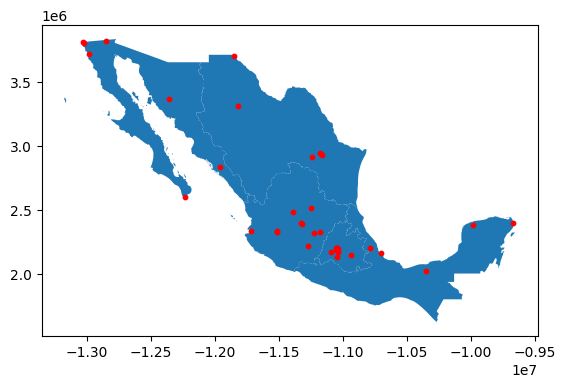

In [ ]:
Costco_gdf = Costco_gdf.set_crs(regiones.crs)
regiones = regiones.to_crs('epsg:3395')
Costco_gdf = Costco_gdf.to_crs(regiones.crs)
mapa = regiones.plot()
Costco_gdf.plot(ax=mapa, color='red', markersize=10)

In [ ]:
Costco_gdf.geometry = Costco_gdf.buffer(120000)

<Axes: >

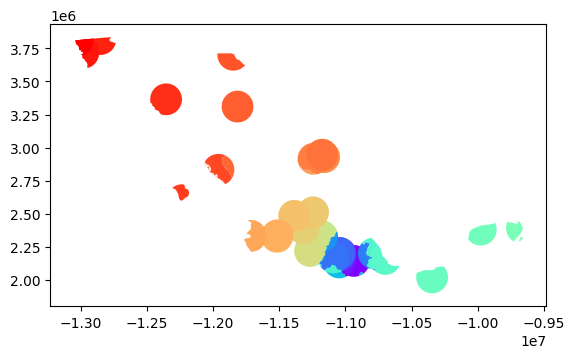

In [ ]:
inter = gpd.overlay(Costco_gdf, regiones, how='intersection')
inter.plot(cmap='rainbow')

<Axes: >

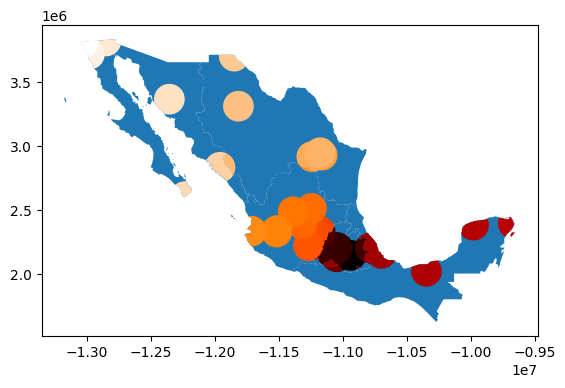

In [ ]:
mapa = regiones.plot()
inter.plot(ax=mapa, cmap='gist_heat')